# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [63]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [64]:
X.shape

(70000, 784)

In [65]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [66]:
digit = X[36000]
digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

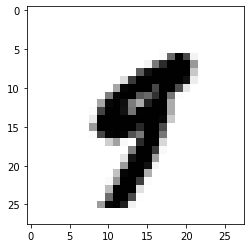

In [67]:
import matplotlib
from matplotlib import pyplot as plt

image = digit.reshape(28,28)
plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [68]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [69]:
X_train = X[:60001]
y_train = y[:60001]
X_test = X[60001:]
y_test = y[60001:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [101]:
new_y_train = np.where(y_train == '5', 1, 0)
new_y_test = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_5 = LogisticRegression().fit(X_train, new_y_train)
y_pred = model_5.predict(X_train)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [103]:
y_pred[36000]

0

In [120]:
y_pred_test = model_5.predict(X_test)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [95]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=int)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [132]:
never_5_clf.fit(X_train)

In [133]:
predictor = never_5_clf.predict(X_test)

In [114]:
predictor

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [121]:
from sklearn.metrics import confusion_matrix

confusion_matrix(new_y_test, y_pred_test)

array([[9034,   73],
       [ 147,  745]])

In [127]:
confusion_matrix(new_y_test, predictor)

array([[9107,    0],
       [ 892,    0]])

In [123]:
from sklearn.metrics import precision_score

precision_score(new_y_test, y_pred_test)

0.910757946210269

In [128]:
precision_score(new_y_test, predictor)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [124]:
from sklearn.metrics import recall_score

recall_score(new_y_test, y_pred_test)

0.8352017937219731

In [134]:
recall_score(new_y_test, predictor)

0.0

In [125]:
from sklearn.metrics import f1_score

f1_score(new_y_test, y_pred_test)

0.871345029239766

In [135]:
f1_score(new_y_test, predictor)

0.0

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# Never5 doesn't work at all
# precision_score is the highest

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

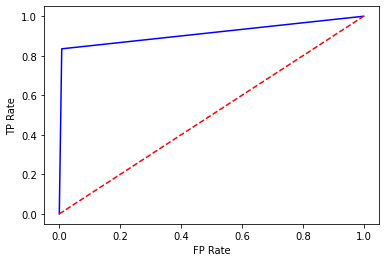

In [147]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(new_y_test, y_pred_test)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

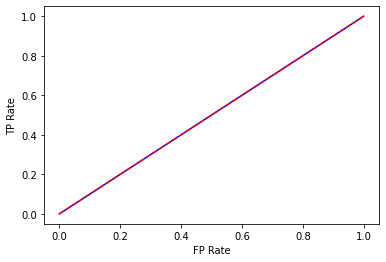

In [148]:
fpr, tpr, threshold = roc_curve(new_y_test, predictor)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(new_y_test, y_pred_test)

0.9135929908546179

In [136]:
roc_auc_score(new_y_test, predictor)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# the one with fives only